In [1]:

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [2]:

!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 93% 14.0M/15.1M [00:00<00:00, 23.1MB/s]
100% 15.1M/15.1M [00:01<00:00, 15.3MB/s]


In [ ]:
# load tqdm
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 91.8 kB 2.8 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47876 sha256=a680af1d45839f733bbe458ec78a2dcdd655b890afbf1c78396471e3a64f3efe
  Stored in directory: /tmp/pip-ephem-wheel-cache-ni50xogk/wheels/65/77/d5/d5ddeac9924f01d101ed3d2bf420c627eba535f8b8d93f27ee
Successfully built tqdm
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.5.2 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.28.1 which is incompatible.
prophet 1.1.2 requires tqdm>=4.36.1, but you have tqdm 4.28.1 which is incompatible.
panel 0.14.4 requires tqdm>=4.

In [3]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Input
from keras.layers import Flatten

In [ ]:
os.chdir('/content/yes')
X=[]
y=[]
for i in tqdm(os.listdir()):
      img=cv2.imread(i) 
      img=cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1])) 
os.chdir('/content/no')
for i in tqdm(os.listdir()):
      img=cv2.imread(i) 
      img=cv2.resize(img,(224,224))
      X.append(img) 
for i in range(1,99):
      y.append('N')
print(y)


['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42) 
print("Shape of an Image in X_train:",X_train[0].shape) 
print("Shape of an Image in x_test:",X_test[0].shape) 


Shape of an Image in X_train: (224, 224, 3)
Shape of an Image in x_test: (224, 224, 3)


In [ ]:
import numpy as np
le=preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train) 
y_test=le.fit_transform(y_test) 
y_train=tf.keras.utils.to_categorical(y_train,num_classes=2) 
y_test=tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train=np.array(y_train) 
X_train=np.array(X_train) 
y_test=np.array(y_test) 
X_test=np.array(X_test)


In [ ]:
print("X_train Shape: ", X_train.shape) 
print("X_test shape:", X_test.shape) 
print("y_train Shape:",y_train.shape) 
print("y_test Shape:",y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test shape: (84, 224, 224, 3)
y_train Shape: (169, 2)
y_test Shape: (84, 2)


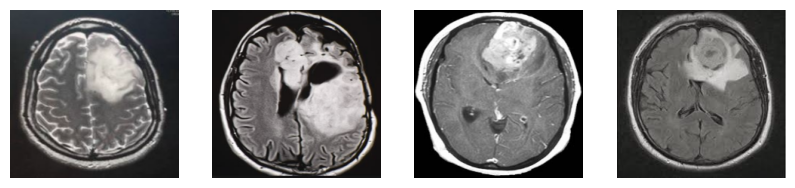

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
from keras.applications import InceptionV3
from keras.layers import Input

img_rows, img_cols=224,224

inception=InceptionV3(weights="imagenet",
                      include_top=False,
                      input_shape=(img_rows, img_cols,3))

#here we freeze the last 4 layers
#layers are set to trainable as True by default
for layer in inception.layers:
    layer.trainable=False

#let's print our layers

for(i,layer) in enumerate(inception.layers):
    print(str(i)+ " "+layer.__class__.__name__, layer.trainable) 

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras import regularizers

def lw(bottom_model,num_classes):
      """   create the top or head of the model that will be placed 
      ontop of the bottom layers"""
      top_model=bottom_model.output
      top_model=GlobalAveragePooling2D()(top_model)
      top_model=Dense(1024,activation='relu')(top_model)
      top_model=Dense(512,activation='relu')(top_model)
      top_model=Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01))(top_model)
      top_model=Dense(num_classes,activation='softmax')(top_model)
      return top_model
  


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes=2
FC_Head=lw(inception, num_classes)
model=Model(inputs=inception.input, outputs=FC_Head) 
print(model.summary()) 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
pip install -U git+https://github.com/apple/coremltools.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/apple/coremltools.git to /tmp/pip-req-build-o_0afahz
  Running command git clone --filter=blob:none --quiet https://github.com/apple/coremltools.git /tmp/pip-req-build-o_0afahz
  Resolved https://github.com/apple/coremltools.git to commit db6f29bd2af39040b1af33b28fcf86d441a8aa63
  Preparing metadata (setup.py) ... done
  Created wheel for coremltools: filename=coremltools-6.3.0-py3-none-any.whl size=1215804 sha256=47f5387a26780d82aead8f4120dc0804132cc73ad65bdf3b55111c3c138dda66
  Stored in directory: /tmp/pip-ephem-wheel-cache-9euxtdac/wheels/53/cd/6c/d94c905b9476d587b6080a06368ebbc8994929d37d47e11918
Successfully built coremltools


In [ ]:
history=model.fit(X_train,y_train,
                  epochs=5,
                  validation_data=(X_test,y_test),
                  verbose=1,
                  initial_epoch=0)

Epoch 1/5
6/6 [==============================] - 54s 8s/step - loss: 32.7611 - accuracy: 0.5325 - val_loss: 11.6371 - val_accuracy: 0.6071
Epoch 2/5
6/6 [==============================] - 36s 6s/step - loss: 11.5580 - accuracy: 0.5976 - val_loss: 2.6460 - val_accuracy: 0.7976
Epoch 3/5
6/6 [==============================] - 33s 6s/step - loss: 5.7014 - accuracy: 0.6627 - val_loss: 2.4559 - val_accuracy: 0.8810
Epoch 4/5
6/6 [==============================] - 40s 7s/step - loss: 4.7894 - accuracy: 0.6864 - val_loss: 3.6581 - val_accuracy: 0.7143
Epoch 5/5
6/6 [==============================] - 40s 7s/step - loss: 3.0861 - accuracy: 0.7811 - val_loss: 2.7456 - val_accuracy: 0.7143


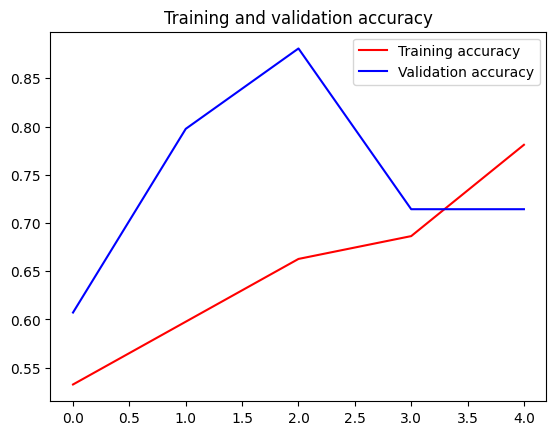

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc, 'b',label='Validation accuracy') 
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

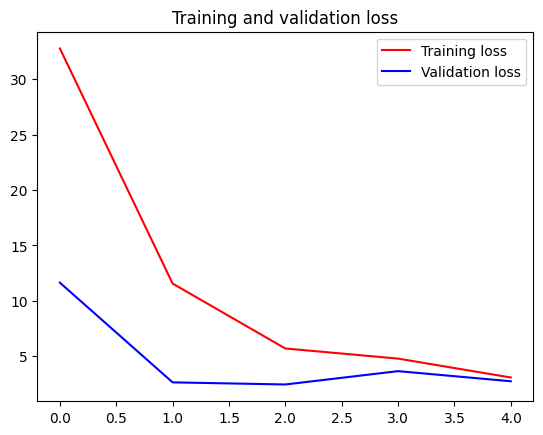

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r' ,label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()

plt.show()